<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Electric_Component_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/Electric Component - Final Project/Training Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('IC_'):
    output = 0
  if file.startswith('SMD_Capacitor_'):
    output = 1
  if file.startswith('SMD_Resistor_'):
    output = 2
  if file.startswith('SMD_Transistor_'):
    output = 3
  if file.startswith('ThroughHole_Capacitor_'):
    output = 4
  if file.startswith('ThroughHole_Resistor_'):
    output = 5
  if file.startswith('ThroughHole_Transistor_'):
    output = 6

  
  photo = load_img(folder + file, target_size=(160,160))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Electric Component - Final Project/Electric_Component_photos.npy', photos)
save('/content/drive/MyDrive/Electric Component - Final Project/Electric_Component_labels.npy', labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(3500, 160, 160, 3) (3500,)


In [ ]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Electric Component - Final Project/Electric_Component_photos.npy')
labels = np.load('/content/drive/MyDrive/Electric Component - Final Project/Electric_Component_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 7

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (160,160, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [ ]:
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.3,1.3], fill_mode="nearest")


In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)


Epoch 1/10
77/77 [==============================] - 28s 222ms/step - loss: 1.9103 - accuracy: 0.1759
Epoch 2/10
77/77 [==============================] - 18s 222ms/step - loss: 1.4327 - accuracy: 0.4331
Epoch 3/10
77/77 [==============================] - 22s 292ms/step - loss: 1.0841 - accuracy: 0.5820
Epoch 4/10
77/77 [==============================] - 17s 218ms/step - loss: 0.9228 - accuracy: 0.6588
Epoch 5/10
77/77 [==============================] - 17s 217ms/step - loss: 0.8275 - accuracy: 0.7029
Epoch 6/10
77/77 [==============================] - 17s 218ms/step - loss: 0.7013 - accuracy: 0.7404
Epoch 7/10
77/77 [==============================] - 19s 249ms/step - loss: 0.6237 - accuracy: 0.7918
Epoch 8/10
77/77 [==============================] - 17s 215ms/step - loss: 0.5563 - accuracy: 0.8151
Epoch 9/10
77/77 [==============================] - 17s 218ms/step - loss: 0.5041 - accuracy: 0.8310
Epoch 10/10
33/33 [==============================] - 1s 27ms/step - loss: 49.5441 - accurac

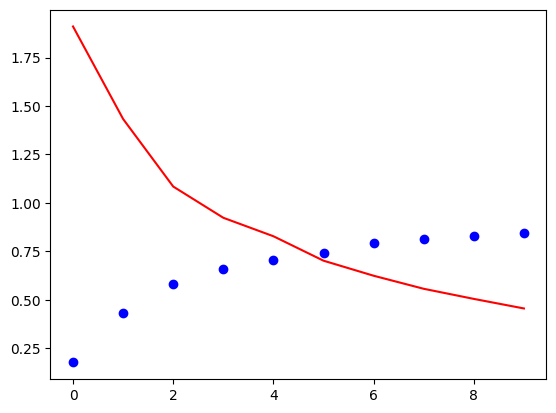

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Electric Component - Final Project/Trained Model/Electric_Component.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Electric Component - Final Project/Trained Model/Electric_Component.h5')

Epoch 1/10
77/77 [==============================] - 32s 284ms/step - loss: 0.1746 - accuracy: 0.9371
Epoch 2/10
77/77 [==============================] - 17s 217ms/step - loss: 0.2207 - accuracy: 0.9216
Epoch 3/10
77/77 [==============================] - 17s 219ms/step - loss: 0.1908 - accuracy: 0.9367
Epoch 4/10
77/77 [==============================] - 18s 232ms/step - loss: 0.1908 - accuracy: 0.9449
Epoch 5/10
77/77 [==============================] - 18s 230ms/step - loss: 0.1628 - accuracy: 0.9445
Epoch 6/10
77/77 [==============================] - 17s 218ms/step - loss: 0.2038 - accuracy: 0.9306
Epoch 7/10
77/77 [==============================] - 17s 226ms/step - loss: 0.1458 - accuracy: 0.9539
Epoch 8/10
77/77 [==============================] - 19s 248ms/step - loss: 0.1307 - accuracy: 0.9600
Epoch 9/10
77/77 [==============================] - 17s 221ms/step - loss: 0.1590 - accuracy: 0.9494
Epoch 10/10
33/33 [==============================] - 1s 25ms/step - loss: 43.1835 - accurac

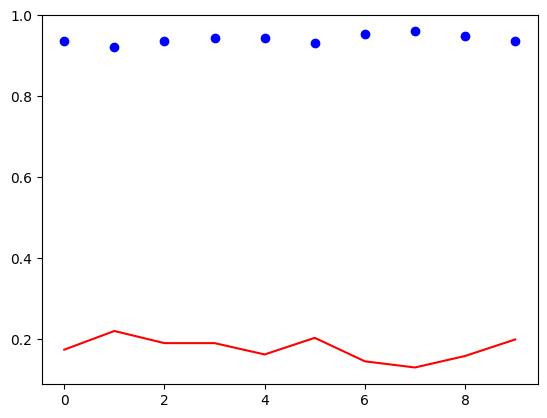

In [ ]:
#Countinue training model
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.3,1.3], fill_mode="nearest")


#Training
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

#Draw Plot
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

#Save model
model.save('/content/drive/MyDrive/Electric Component - Final Project/Trained Model/Electric_Component.h5')

Epoch 1/20
39/39 [==============================] - 18s 411ms/step - loss: 0.2103 - accuracy: 0.9257
Epoch 2/20
39/39 [==============================] - 16s 417ms/step - loss: 0.2053 - accuracy: 0.9322
Epoch 3/20
39/39 [==============================] - 17s 425ms/step - loss: 0.1796 - accuracy: 0.9420
Epoch 4/20
39/39 [==============================] - 16s 422ms/step - loss: 0.1812 - accuracy: 0.9400
Epoch 5/20
39/39 [==============================] - 16s 416ms/step - loss: 0.1687 - accuracy: 0.9424
Epoch 6/20
39/39 [==============================] - 16s 414ms/step - loss: 0.1589 - accuracy: 0.9433
Epoch 7/20
39/39 [==============================] - 16s 419ms/step - loss: 0.1448 - accuracy: 0.9506
Epoch 8/20
39/39 [==============================] - 18s 465ms/step - loss: 0.1677 - accuracy: 0.9359
Epoch 9/20
39/39 [==============================] - 17s 420ms/step - loss: 0.1864 - accuracy: 0.9351
Epoch 10/20
39/39 [==============================] - 17s 425ms/step - loss: 0.1618 - accura

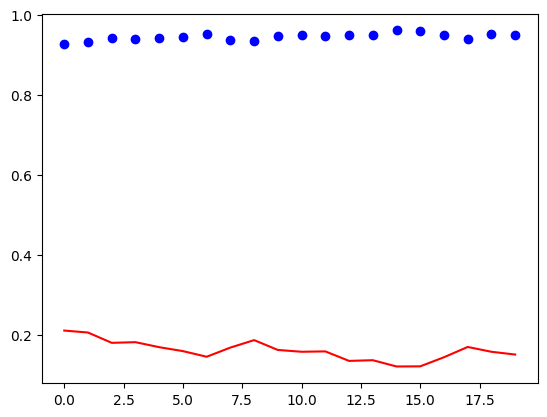

In [ ]:
#Countinue training model
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.3,1.3], fill_mode="nearest")

#Training
train = model.fit(aug.flow(x_trains, y_trains, batch_size=64),
                               epochs = 20)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

#Draw Plot
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

#Save model
model.save('/content/drive/MyDrive/Electric Component - Final Project/Trained Model/Electric_Component.h5')

Epoch 1/40
39/39 [==============================] - 18s 456ms/step - loss: 0.0711 - accuracy: 0.9751
Epoch 2/40
39/39 [==============================] - 17s 426ms/step - loss: 0.0504 - accuracy: 0.9824
Epoch 3/40
39/39 [==============================] - 17s 423ms/step - loss: 0.0498 - accuracy: 0.9837
Epoch 4/40
39/39 [==============================] - 16s 421ms/step - loss: 0.0454 - accuracy: 0.9845
Epoch 5/40
39/39 [==============================] - 17s 433ms/step - loss: 0.0398 - accuracy: 0.9857
Epoch 6/40
39/39 [==============================] - 17s 441ms/step - loss: 0.0378 - accuracy: 0.9878
Epoch 7/40
39/39 [==============================] - 16s 420ms/step - loss: 0.0632 - accuracy: 0.9792
Epoch 8/40
39/39 [==============================] - 16s 421ms/step - loss: 0.0482 - accuracy: 0.9820
Epoch 9/40
39/39 [==============================] - 16s 422ms/step - loss: 0.0517 - accuracy: 0.9820
Epoch 10/40
39/39 [==============================] - 18s 458ms/step - loss: 0.0404 - accura

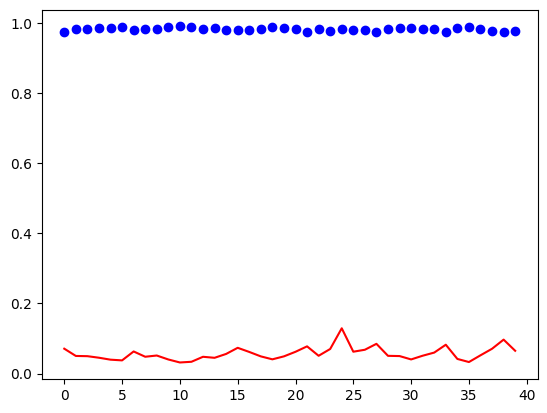

In [ ]:
#Countinue training model
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.3,1.4], fill_mode="nearest")

#Training
train = model.fit(aug.flow(x_trains, y_trains, batch_size=64),
                               epochs = 40)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

#Draw Plot
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

#Save model
model.save('/content/drive/MyDrive/Electric Component - Final Project/Trained Model/Electric_Component.h5')

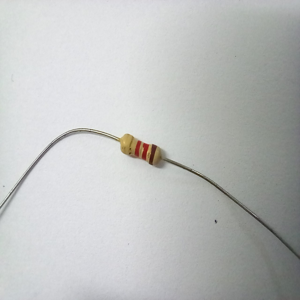

1/1 [==============================] - 0s 441ms/step
['ThroughHole_Resistor']


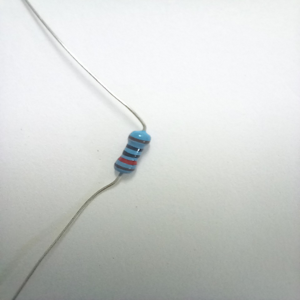

1/1 [==============================] - 0s 30ms/step
['ThroughHole_Resistor']


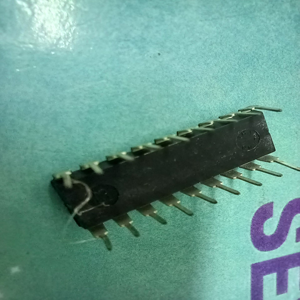

1/1 [==============================] - 0s 30ms/step
['IC']


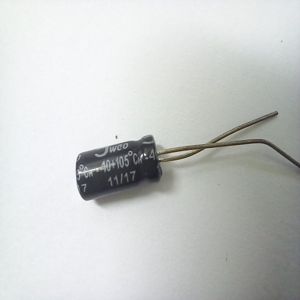

1/1 [==============================] - 0s 21ms/step
['ThroughHole_Capacitor']


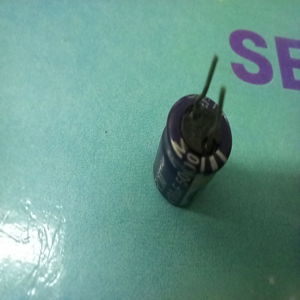

1/1 [==============================] - 0s 28ms/step
['ThroughHole_Transistor']


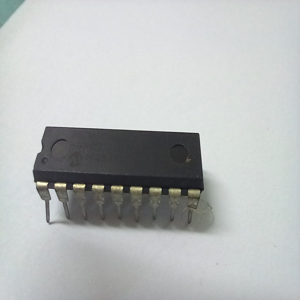

1/1 [==============================] - 0s 21ms/step
['IC']


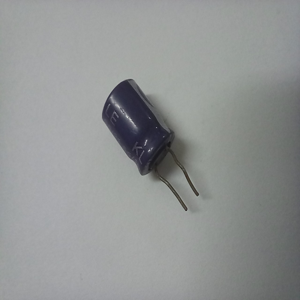

1/1 [==============================] - 0s 21ms/step
['ThroughHole_Capacitor']


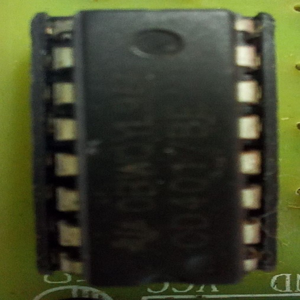

1/1 [==============================] - 0s 20ms/step
['IC']


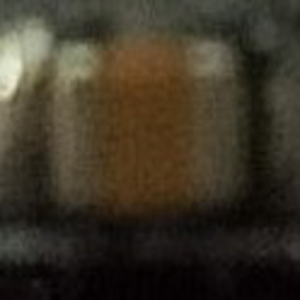

1/1 [==============================] - 0s 20ms/step
['SMD_Capacitor']


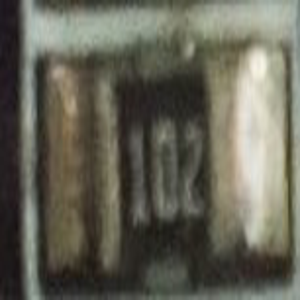

1/1 [==============================] - 0s 20ms/step
['SMD_Capacitor']


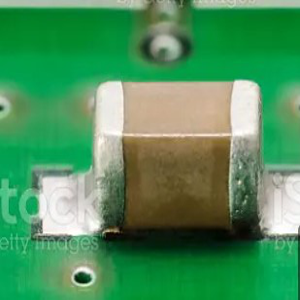

1/1 [==============================] - 0s 22ms/step
['SMD_Capacitor']


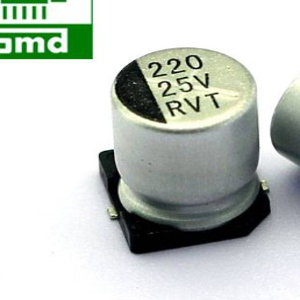

1/1 [==============================] - 0s 19ms/step
['ThroughHole_Capacitor']


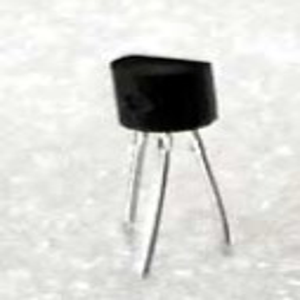

1/1 [==============================] - 0s 19ms/step
['ThroughHole_Transistor']


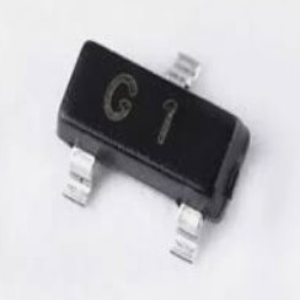

1/1 [==============================] - 0s 20ms/step
['SMD_Transistor']


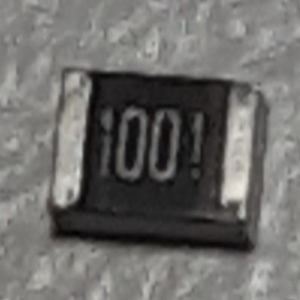

1/1 [==============================] - 0s 20ms/step
['SMD_Resistor']


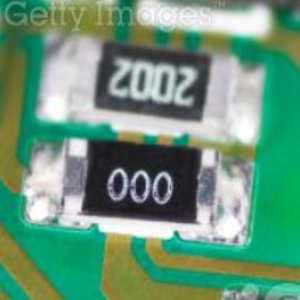

1/1 [==============================] - 0s 24ms/step
['SMD_Resistor']


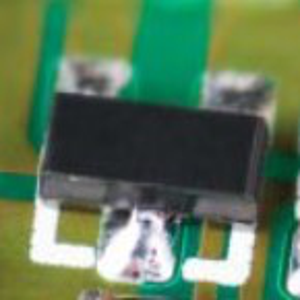

1/1 [==============================] - 0s 29ms/step
['SMD_Transistor']


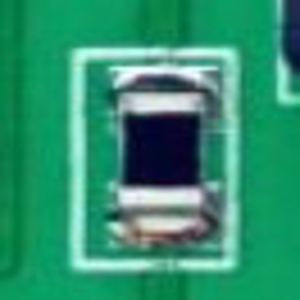

1/1 [==============================] - 0s 20ms/step
['SMD_Resistor']


In [ ]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['IC', 'SMD_Capacitor', 'SMD_Resistor', 'SMD_Transistor',
                  'ThroughHole_Capacitor', 'ThroughHole_Resistor', 
                  'ThroughHole_Transistor'])

# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (160, 160)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Electric Component - Final Project/Testing Data'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,160,160,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])